# importing libraries

In [383]:
import numpy as np # importing numpy pandas seaborn matplotlib.pyplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load DataSet

In [384]:
titanic_train=pd.read_csv(r'C:\Users\naren\Downloads\titanic\train.csv') # loading Training and Test Data
titanic_test=pd.read_csv(r'C:\Users\naren\Downloads\titanic\test.csv')

In [385]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [386]:
titanic_train.rename({'Pclass':'TicketClass','Parch':'Parent-children','SibSp':'Siblings-Spouses','Embarked':'Onboard'},axis=1,inplace=True)

# Describe DataSet

In [387]:
titanic_train.describe() # describing dataset

,PassengerId,Survived,TicketClass,Age,Siblings-Spouses,Parent-children,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# survial counts

In [388]:
titanic_train.Survived.value_counts() # male vs female survived counts

0    549
1    342
Name: Survived, dtype: int64

# Survived not survived Graph

Text(0.5, 1.0, 'Not Survived vs Survived')

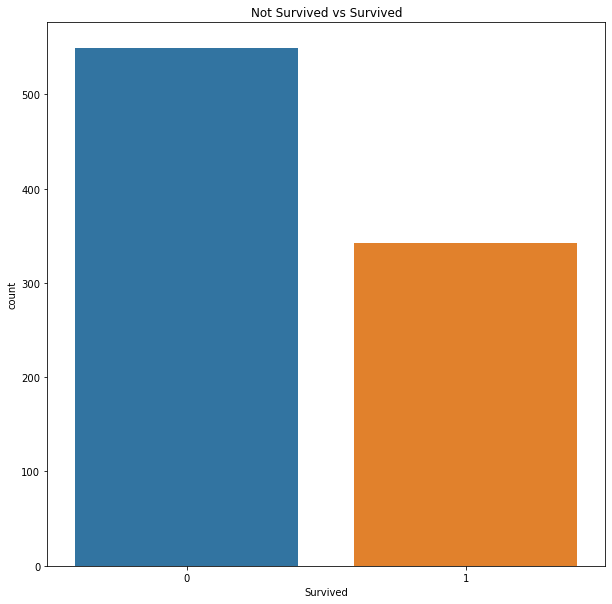

In [389]:
plt.figure(figsize=(10,10))
sns.countplot(x='Survived',data=titanic_train) # survival vs non survival Graph
plt.title('Not Survived vs Survived')

# Male vs Female Counts

In [390]:
titanic_train.Sex.value_counts() # No of Male vs Female

male      577
female    314
Name: Sex, dtype: int64

# male vs female count graph

Text(0.5, 1.0, 'Male vs Female Count Before Survived')

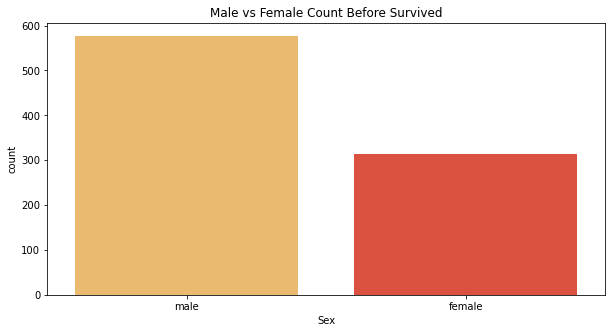

In [391]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=titanic_train,palette='YlOrRd')
plt.title('Male vs Female Count Before Survived')

In [392]:
male=titanic_train.loc[titanic_train['Sex']=='male']['Survived']


In [393]:
male_survived=sum(male)/len(male) # Male survived Percentage and No of Male
male_survived,sum(male)

(0.18890814558058924, 109)

In [394]:
female=titanic_train.loc[titanic_train['Sex']=='female']['Survived'] ## Female survived Percentage and No of Female
female_survived=sum(female)/len(female)
female_survived,sum(female)

(0.7420382165605095, 233)

In [395]:
df={'Gender':['Male','Female'],'Percentage_survived':[male_survived*100,female_survived*100]}

In [396]:
survival=pd.DataFrame(df) # Table show Male and Female survival Percentage
survival

,Gender,Percentage_survived
0,Male,18.890815
1,Female,74.203822


# male vs female survived in percentage

Text(0.5, 1.0, 'Male Survived vs Female Survived')

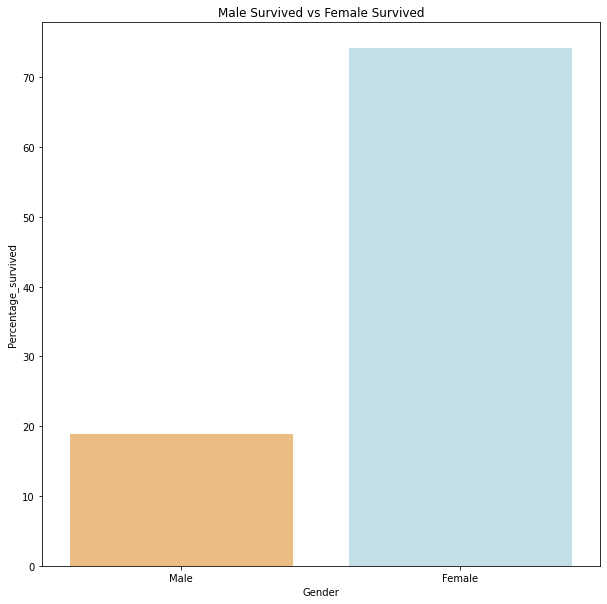

In [397]:
plt.figure(figsize=(10,10))
sns.barplot(x='Gender',y='Percentage_survived',data=survival,palette='RdYlBu')
plt.title('Male Survived vs Female Survived')

In [398]:
titanic_train['TicketClass'].value_counts() #People in TicketClass1,TicketClass2,TicketClass3

3    491
1    216
2    184
Name: TicketClass, dtype: int64

# no of people in 3 Pclass

Text(0.5, 1.0, 'People Count in TicketClass 1 vs TicketClass 2 vs TicketClass 3')

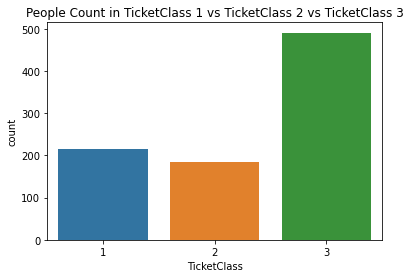

In [399]:
sns.countplot(x='TicketClass',data=titanic_train)
plt.title('People Count in TicketClass 1 vs TicketClass 2 vs TicketClass 3')

In [400]:
TC1_survived=titanic_train.loc[titanic_train['TicketClass']==1]['Survived'].sum() # Ticket class 1 people total survived

In [401]:
TC2_survived=titanic_train.loc[titanic_train['TicketClass']==2]['Survived'].sum()# Ticket class 2 people total survived

In [402]:
TC3_survived=titanic_train.loc[titanic_train['TicketClass']==3]['Survived'].sum()# Ticket class 3 people total survived

In [403]:
df={'TicketClass':['TicketClass_1','TicketClass_2','TicketClass_3'],'TicketClass_survived_count':[TC1_survived,TC2_survived,TC3_survived]}

In [404]:
survival=pd.DataFrame(df) # Table shows TicketClass1,TicketClass2,TicketClass3 Survived
survival

,TicketClass,TicketClass_survived_count
0,TicketClass_1,136
1,TicketClass_2,87
2,TicketClass_3,119


# people survived according to Pclass

Text(0.5, 1.0, 'People Survived in TicketClass 1 vs TicketClass 2 vs TicketClass 3')

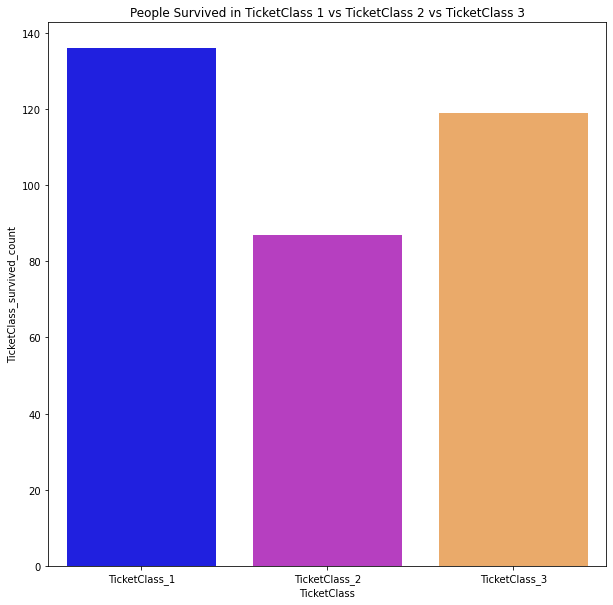

In [405]:
plt.figure(figsize=(10,10))
sns.barplot(x='TicketClass',y='TicketClass_survived_count',data=survival,palette='gnuplot2')
plt.title('People Survived in TicketClass 1 vs TicketClass 2 vs TicketClass 3')

In [406]:
def missing_values_in_dataset(titanic_train,titanic_columns): # To know Missing values in the DataSet
    leng=len(titanic_train)
    missing_columns_values={}
    for column_s in titanic_columns:
        
         missing_columns_values[column_s]= leng-(titanic_train[column_s].value_counts().sum())
    return missing_columns_values
            
        
    
    

In [407]:
len(titanic_train) # length of Train Data

891

# Missing values in Dataset

In [408]:
missing_values_in_dataset(titanic_train,titanic_train.columns) # Missing values in all columns

{'PassengerId': 0,
 'Survived': 0,
 'TicketClass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'Siblings-Spouses': 0,
 'Parent-children': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Onboard': 2}

# column names

In [409]:
titanic_train.columns # titanic train column Names

Index(['PassengerId', 'Survived', 'TicketClass', 'Name', 'Sex', 'Age',
       'Siblings-Spouses', 'Parent-children', 'Ticket', 'Fare', 'Cabin',
       'Onboard'],
      dtype='object')

# Heatmap

<AxesSubplot:>

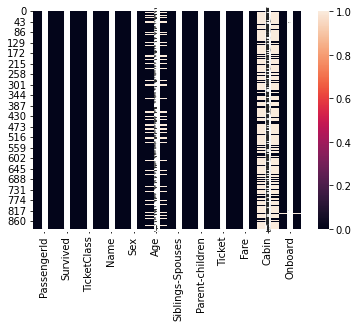

In [410]:
sns.heatmap(titanic_train.isnull(),annot=True) # Heat Map to know the missing values

# NO OF  SIBLINGS AND SPOUSES GRAPH OF ALL PASSENGERS Before Survial

<AxesSubplot:xlabel='Siblings-Spouses', ylabel='count'>

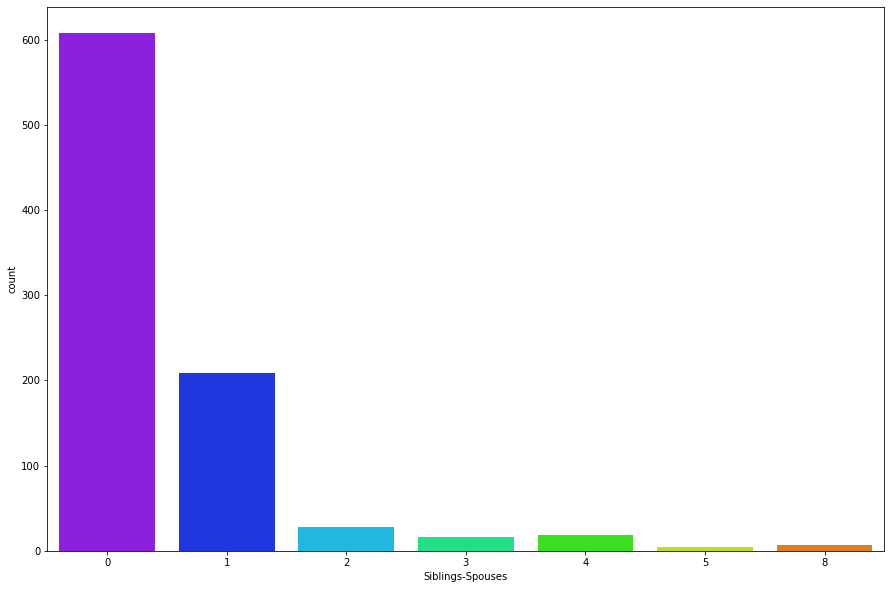

In [411]:
plt.figure(figsize=(15,10))
sns.countplot(x='Siblings-Spouses',data=titanic_train,palette='gist_rainbow_r')

In [412]:
sibling_1_survived=titanic_train.loc[titanic_train['Siblings-Spouses']==1]['Survived'].sum() # Passengers who survived and has one sibling-spouse

In [413]:
sibling_2_survived=titanic_train.loc[titanic_train['Siblings-Spouses']==2]['Survived'].sum() # Passengers who survived and has two sibling-spouse

In [414]:
sibling_3_survived=titanic_train.loc[titanic_train['Siblings-Spouses']==3]['Survived'].sum() # Passengers who survived and has three sibling-spouse

In [415]:
sibling_4_survived=titanic_train.loc[titanic_train['Siblings-Spouses']==4]['Survived'].sum() # Passengers who survived and has Four sibling-spouse

In [416]:
sibling_5_survived=titanic_train.loc[titanic_train['Siblings-Spouses']==5]['Survived'].sum() # Passengers who survived and has Five sibling-spouse

In [417]:
sibling_6_survived=titanic_train.loc[titanic_train['Siblings-Spouses']==6]['Survived'].sum() # Passengers who survived and has six sibling-spouse

In [418]:
sibling_7_survived=titanic_train.loc[titanic_train['Siblings-Spouses']==7]['Survived'].sum() # Passengers who survived and has seven sibling-spouse

In [419]:
sibling_8_survived=titanic_train.loc[titanic_train['Siblings-Spouses']==8]['Survived'].sum() # Passengers who survived and has eight sibling-spouse

In [420]:
df={'Names':['Sibling1','Sibling2','Sibling3','Sibling4','Sibling5','Sibling6','Sibling7','Sibling8'],'Passenger_Siblings':[sibling_1_survived,sibling_2_survived,sibling_3_survived,sibling_4_survived,sibling_5_survived,sibling_6_survived,sibling_7_survived,sibling_8_survived]}

In [421]:
survival=pd.DataFrame(df) # Table shows who survived and have siblings
survival

,Names,Passenger_Siblings
0,Sibling1,112
1,Sibling2,13
2,Sibling3,4
3,Sibling4,3
4,Sibling5,0
5,Sibling6,0
6,Sibling7,0
7,Sibling8,0


# NO OF SIBLINGS AND SPOUSES OF WHO SURVIVED

<AxesSubplot:xlabel='Names', ylabel='Passenger_Siblings'>

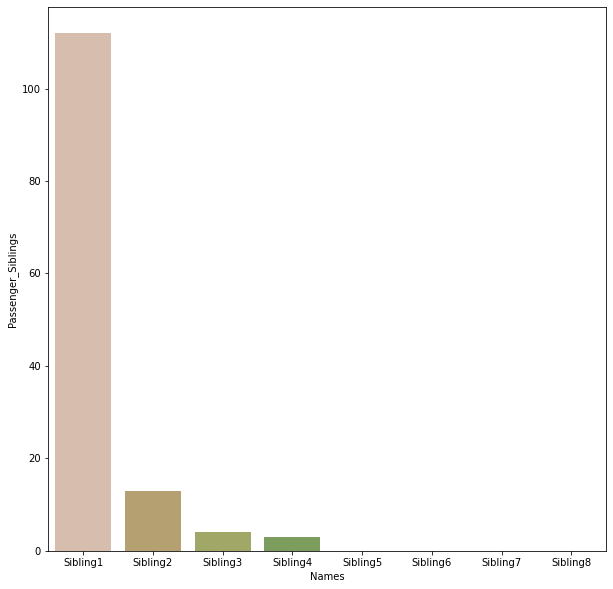

In [422]:
plt.figure(figsize=(10,10))#This graph show those who survived and they have siblings and spouses those are not survived
sns.barplot(x='Names',y='Passenger_Siblings',data=survival,palette='gist_earth_r')

In [423]:
titanic_train['Parent-children'].value_counts() #Parents and children value counts

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parent-children, dtype: int64

<AxesSubplot:xlabel='Parent-children', ylabel='count'>

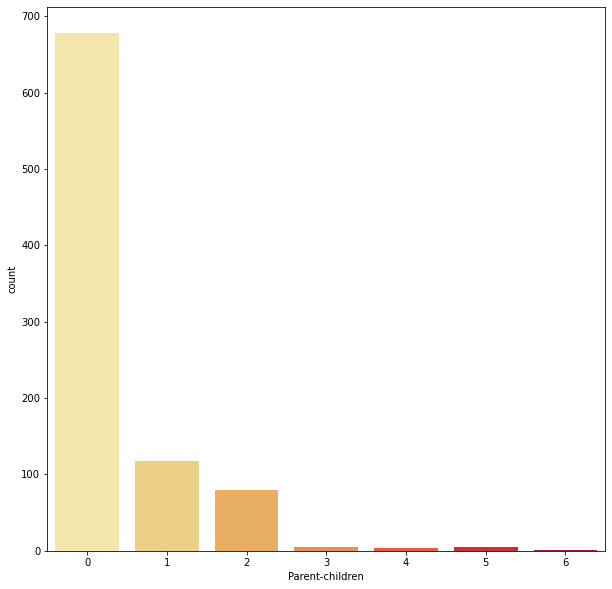

In [424]:
plt.figure(figsize=(10,10))#Parents and children value counts Graph
sns.countplot(x='Parent-children',data=titanic_train,palette='YlOrRd')

In [425]:
titanic_train['Onboard'].fillna('S',inplace=True)# Filling null value in onboard column

In [426]:
titanic_train['Onboard'].value_counts() #No of People according to their onboard location

S    646
C    168
Q     77
Name: Onboard, dtype: int64

# PEOPLE ONBARD LOCATION GRAPH

Text(0.5, 1.0, 'People Onboard Location')

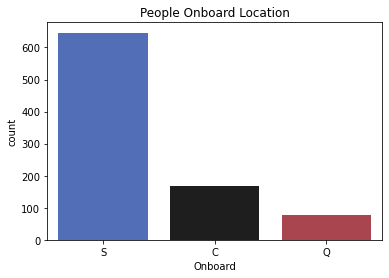

In [427]:
sns.countplot(x='Onboard',data=titanic_train,palette='icefire')
plt.title('People Onboard Location')

In [428]:
onboard_s=titanic_train.loc[titanic_train['Onboard']=='S']['Survived'].sum() # no of People who onboarded on Southampton and survived

In [429]:
onboard_c=titanic_train.loc[titanic_train['Onboard']=='C']['Survived'].sum() # No of People who onboarded on Cherbourg and survived

In [430]:
onboard_q=titanic_train.loc[titanic_train['Onboard']=='Q']['Survived'].sum()# No of People who onboarded on  Queenstown and survived

In [431]:
df={'OnBoard':['S','C','Q'],'survived':[onboard_s,onboard_c,onboard_q]}

In [432]:
survival=pd.DataFrame(df)# Table shows no of people who survived according to their onboard location
survival

,OnBoard,survived
0,S,219
1,C,93
2,Q,30


# NO OF PEOPLE SURVIVED ACCORDING TO ONBOARD

Text(0.5, 1.0, 'People Survived according to their Onboard Location')

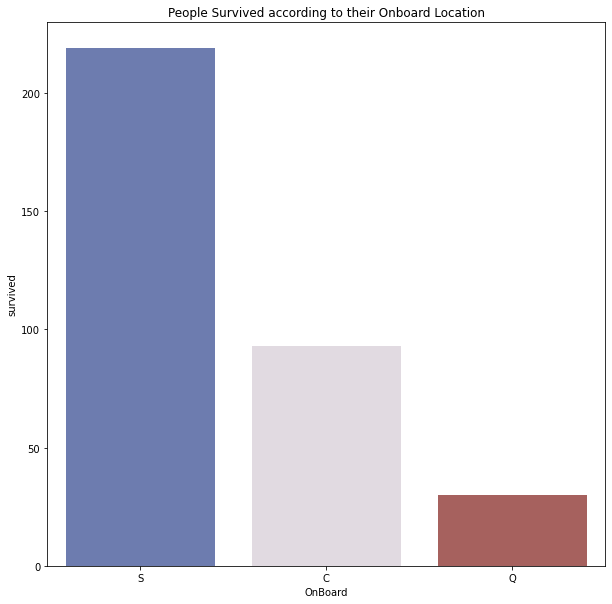

In [433]:
plt.figure(figsize=(10,10))#Graph shows people survived according to their onboard location
sns.barplot(x='OnBoard',y='survived',data=survival,palette='twilight_shifted')
plt.title('People Survived according to their Onboard Location')

In [434]:
titanic_train.loc[titanic_train['TicketClass']==1]['Age'].mean() #Mean age of TicketClass1

38.233440860215055

In [435]:
titanic_train.loc[titanic_train['TicketClass']==2]['Age'].mean()#Mean age of TicketClass2

29.87763005780347

In [436]:
titanic_train.loc[titanic_train['TicketClass']==3]['Age'].mean()# Mean Age of TicketClass3

25.14061971830986

In [437]:
def Age(c):#Filling the NUll values in the Age column according to the mean Ages in their Ticket class
    Age=c[0]
    TicketClass=c[1]
    if pd.isnull(Age):
        if TicketClass == 1:
            return 38
        elif TicketClass == 2:
            return 30
        else:
            return 25
    else:
        return Age
titanic_train['Age']=titanic_train[['Age','TicketClass']].apply(Age,axis=1)

In [438]:
titanic_train['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [439]:
def age_classification(cols):#classfying people according to their age
    Age=cols
    if Age<=16.0:
        return 'children'
    elif Age >16.0 or Age<40.0:
         return 'young_adult'
    elif Age > 40.0:
        return 'old_adults'
titanic_train['Age_class']=titanic_train['Age'].apply(age_classification)

In [440]:
titanic_train

,PassengerId,Survived,TicketClass,Name,Sex,Age,Siblings-Spouses,Parent-children,Ticket,Fare,Cabin,Onboard,Age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young_adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,young_adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young_adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young_adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young_adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young_adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,young_adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S,young_adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young_adult


<AxesSubplot:xlabel='Age_class', ylabel='count'>

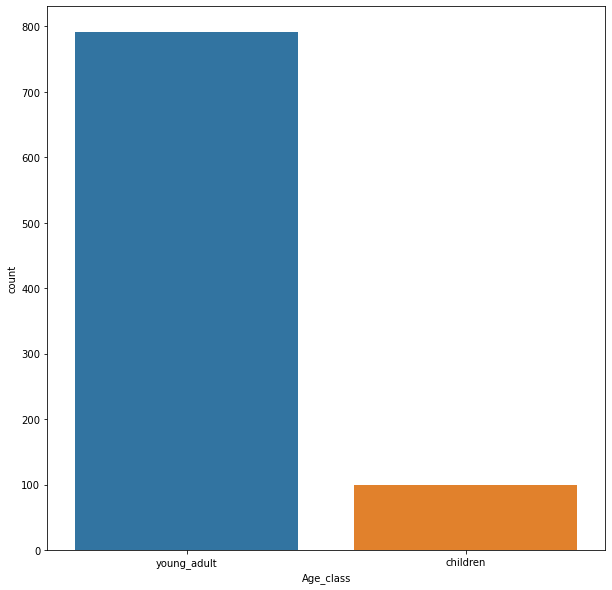

In [441]:
plt.figure(figsize=(10,10))
sns.countplot(x='Age_class',data=titanic_train)# No of children vs young_adults Graph

In [442]:
titanic_train.Age_class.value_counts()#Young adults vs children count

young_adult    791
children       100
Name: Age_class, dtype: int64

In [443]:
children_survived=titanic_train.loc[titanic_train['Age_class']=='children']['Survived'].sum() #No of children survived

In [444]:
young_adult_survived=titanic_train.loc[titanic_train['Age_class']=='young_adult']['Survived'].sum()# No of young_adult survived

In [445]:
old_adult_survived=titanic_train.loc[titanic_train['Age_class']=='old_adults']['Survived'].sum()# No of old_adult survived

In [446]:
df={'Age_class':['children','young_adult','old_adult'],'survived':[children_survived,young_adult_survived,old_adult_survived]}

In [447]:
df

{'Age_class': ['children', 'young_adult', 'old_adult'],
 'survived': [55, 287, 0]}

In [448]:
survival=pd.DataFrame(df)#Table shows people survived according to their class
survival

,Age_class,survived
0,children,55
1,young_adult,287
2,old_adult,0


<AxesSubplot:xlabel='Age_class', ylabel='survived'>

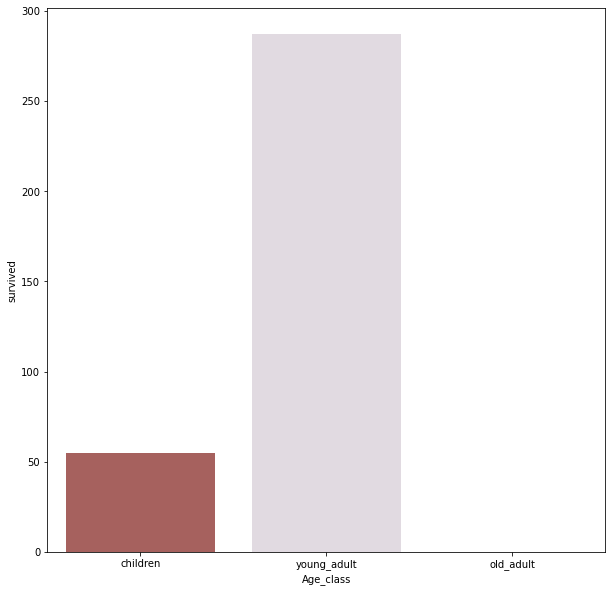

In [449]:
plt.figure(figsize=(10,10))#graph according to survived in children vs young adult vs old adulta
sns.barplot(x='Age_class',y='survived',data=survival,palette='twilight_shifted_r')

In [450]:
titanic_train.drop(['Cabin','Ticket','Age_class'],axis=1,inplace=True)

In [451]:
titanic_train

,PassengerId,Survived,TicketClass,Name,Sex,Age,Siblings-Spouses,Parent-children,Fare,Onboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


# Label Encoding

In [452]:
from sklearn.preprocessing import LabelEncoder#Lable Encoding the Machine cannot understand text data so we are converting into numerical values so that machine can perform tasks
le=LabelEncoder()
titanic_train['Name']=le.fit_transform(titanic_train.Name)
titanic_train['Sex']=le.fit_transform(titanic_train.Sex)
titanic_train['Onboard']=le.fit_transform(titanic_train.Onboard)





In [453]:
titanic_train

,PassengerId,Survived,TicketClass,Name,Sex,Age,Siblings-Spouses,Parent-children,Fare,Onboard
0,1,0,3,108,1,22.0,1,0,7.2500,2
1,2,1,1,190,0,38.0,1,0,71.2833,0
2,3,1,3,353,0,26.0,0,0,7.9250,2
3,4,1,1,272,0,35.0,1,0,53.1000,2
4,5,0,3,15,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,13.0000,2
887,888,1,1,303,0,19.0,0,0,30.0000,2
888,889,0,3,413,0,25.0,1,2,23.4500,2
889,890,1,1,81,1,26.0,0,0,30.0000,0


In [454]:
titanic_train['Sex'].unique()

array([1, 0])

# Training and Validating Data

In [455]:
X=titanic_train.drop(['Survived','PassengerId','Name'],axis=1)# Drop the columns which are not used which can create noise and classifying data into dependent and independent columns
y=titanic_train['Survived']# y is the target class that tells person survived or not

In [456]:
from sklearn.model_selection import train_test_split #importing libraries to split train and test data

In [457]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5,random_state=101)# classifying data into training and validation data which can be used to train the model and check the accurancy of model

In [458]:
X_train#train data

,TicketClass,Sex,Age,Siblings-Spouses,Parent-children,Fare,Onboard
517,3,1,25.0,0,0,24.1500,1
725,3,1,20.0,0,0,8.6625,2
531,3,1,25.0,0,0,7.2292,0
342,2,1,28.0,0,0,13.0000,2
701,1,1,35.0,0,0,26.2875,2
...,...,...,...,...,...,...,...
575,3,1,19.0,0,0,14.5000,2
838,3,1,32.0,0,0,56.4958,2
337,1,0,41.0,0,0,134.5000,0
523,1,0,44.0,0,1,57.9792,0


In [459]:
X_valid#validation data

,TicketClass,Sex,Age,Siblings-Spouses,Parent-children,Fare,Onboard
331,1,1,45.5,0,0,28.5000,2
700,1,0,18.0,1,0,227.5250,0
748,1,1,19.0,1,0,53.1000,2
751,3,1,6.0,0,1,12.4750,2
481,2,1,30.0,0,0,0.0000,2
...,...,...,...,...,...,...,...
464,3,1,25.0,0,0,8.0500,2
593,3,0,25.0,0,2,7.7500,1
205,3,0,2.0,0,1,10.4625,2
385,2,1,18.0,0,0,73.5000,2


# Model Building

# Logistic Regression Model

In [460]:
from sklearn.linear_model import LogisticRegression# importing the logistic Regression Model

In [461]:
logistic_reg=LogisticRegression()

In [462]:
logistic_reg.fit(X_train,y_train)# fitting the model with data

LogisticRegression()

In [463]:
pred_1=logistic_reg.predict(X_valid)#Testing the model with the validation data
pred_1

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [464]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_valid,pred_1)#Accuracy of the Logistic regression model on the validation data
acc1

0.7982062780269058

# Decision Tree Model

In [465]:
from sklearn.tree import DecisionTreeClassifier# importing the Decision Tree Model

In [466]:
Decisiontree = DecisionTreeClassifier(random_state=0)

In [467]:
Decisiontree.fit(X_train,y_train)# fitting the model with data

DecisionTreeClassifier(random_state=0)

In [468]:
pred_2= Decisiontree.predict(X_valid)#Testing the model with the validation data
pred_2

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

In [469]:
from sklearn.metrics import accuracy_score#Accuracy of the Decisiontree model on the validation data
acc2=accuracy_score(y_valid,pred_2)
print(f'Decision Tree accuracy on Validation Data is {acc2}')

Decision Tree accuracy on Validation Data is 0.7645739910313901


# Random Forest Model

In [470]:
from sklearn.ensemble import RandomForestClassifier# importing the RandomForestClassifier
randomforest = RandomForestClassifier(max_depth=2,random_state=0)
randomforest.fit(X_train,y_train)# fitting the model with data
pred_3=randomforest.predict(X_valid)#Testing the model with the validation data
pred_3

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [471]:
acc3=accuracy_score(y_valid,pred_3)#Accuracy of the Random Forest model on the validation data
print(f'Random Forest accuracy on Validation Data is {acc3}')

Random Forest accuracy on Validation Data is 0.8161434977578476


# Test Data

In [472]:
titanic_test=pd.read_csv(r'C:\Users\naren\Downloads\titanic\test.csv')#LoadingTest Data

In [473]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [474]:
titanic_test.rename({'Pclass':'TicketClass','Parch':'Parent-children','SibSp':'Siblings-Spouses','Embarked':'Onboard'},axis=1,inplace=True)

In [475]:
titanic_test.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)#Droping column which is not useful that can create noise

In [476]:
titanic_test#test_data after droping the columns

,TicketClass,Sex,Age,Siblings-Spouses,Parent-children,Fare,Onboard
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [477]:
from sklearn.preprocessing import LabelEncoder##Lable Encoding the Machine cannot understand text data so we are converting into numerical values so that machine can perform tasks
le=LabelEncoder()

titanic_test['Sex']=le.fit_transform(titanic_test.Sex)
titanic_test['Onboard']=le.fit_transform(titanic_test.Onboard)



In [478]:
titanic_test#testdata after label encoding

,TicketClass,Sex,Age,Siblings-Spouses,Parent-children,Fare,Onboard
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


In [479]:
def Age(c):#Filling the NUll values in the Age column according to the mean Ages in their Ticket class
    Age=c[0]
    TicketClass=c[1]
    if pd.isnull(Age):
        if TicketClass == 1:
            return 38
        elif TicketClass == 2:
            return 30
        else:
            return 25
    else:
        return Age
titanic_test['Age']=titanic_test[['Age','TicketClass']].apply(Age,axis=1)

In [480]:
titanic_test#test data after label encoding

,TicketClass,Sex,Age,Siblings-Spouses,Parent-children,Fare,Onboard
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,25.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,25.0,0,0,8.0500,2


<AxesSubplot:>

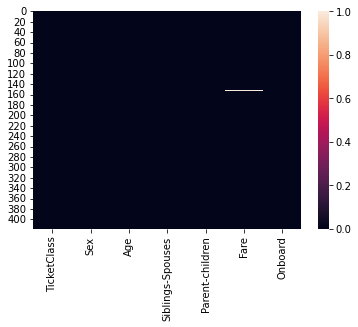

In [481]:
sns.heatmap(titanic_test.isnull())#heatmap for knowing the missing values

In [482]:
titanic_test.fillna(0,inplace=True)#filling the testdata missing values wiith 0

In [483]:
pred=logistic_reg.predict(titanic_test)

In [484]:

titanic_test

,TicketClass,Sex,Age,Siblings-Spouses,Parent-children,Fare,Onboard
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,25.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,25.0,0,0,8.0500,2


In [485]:
titanic_test['Age'].isnull().value_counts()#null value counts

False    418
Name: Age, dtype: int64

In [486]:
test_data=pd.read_csv(r'C:\Users\naren\Downloads\titanic\gender_submission.csv')

In [487]:
test_data.drop('PassengerId',axis=1,inplace=True)

In [488]:
test_data

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [489]:
# Decision Tree Accuracy on Test Data

In [490]:
pred_4=Decisiontree.predict(titanic_test)

In [491]:
acc3=accuracy_score(test_data,pred_4)
acc3
print(f'Decision Tree accuracy on Test Data is {acc3}')

Decision Tree accuracy on Test Data is 0.784688995215311


In [492]:
# Random Forest Accuracy on TestData

In [493]:
pred_5=randomforest.predict(titanic_test)

In [494]:
acc3=accuracy_score(test_data,pred_5)
print(f'Random Forest accuracy on Test Data is {acc3}')

Random Forest accuracy on Test Data is 0.8899521531100478


# Logistic Regression accuracy on Test Data

In [495]:
from sklearn.metrics import accuracy_score
accuracy_score(test_data,pred)

0.9019138755980861